In [1]:
import platform
import tensorflow
import keras
print("Platform: {}".format(platform.platform()))
print("Tensorflow version: {}".format(tensorflow.__version__))
print("Keras version: {}".format(keras.__version__))

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from IPython.display import Image

/Users/r3dmaohong/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
Using TensorFlow backend.


Platform: Darwin-16.6.0-x86_64-i386-64bit
Tensorflow version: 1.4.1
Keras version: 2.1.2


In [11]:
# sequential
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Conv2D, MaxPool2D
from keras.utils import plot_model

input_shape = (224, 224, 3) # RGB 224x224 (height, width, channel)

model = Sequential(name='vgg16-sequential')

# first convolution block
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=input_shape, name='block1_conv1'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', name='block1_conv2'))
model.add(MaxPool2D((2, 2), strides=(2, 2), name='block1_pool'))

# second convolution block
model.add(Conv2D(128, (3, 3), padding='same', activation='relu', name='block2_conv1'))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu', name='block2_conv2'))
model.add(MaxPool2D((2, 2), strides=(2, 2), name='block2_pool'))

# third convolution block
model.add(Conv2D(256, (3, 3), padding='same', activation='relu', name='block3_conv1'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu', name='block3_conv2'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu', name='block3_conv3'))
model.add(MaxPool2D((2, 2), strides=(2, 2), name='block3_pool'))

# forth convolution block
model.add(Conv2D(512, (3, 3), padding='same', activation='relu', name='block4_conv1'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu', name='block4_conv2'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu', name='block4_conv3'))
model.add(MaxPool2D((2, 2), strides=(2, 2), name='block4_pool'))

# fifth convolution block
model.add(Conv2D(512, (3, 3), padding='same', activation='relu', name='block5_conv1'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu', name='block5_conv2'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu', name='block5_conv3'))
model.add(MaxPool2D((2, 2), strides=(2, 2), name='block5_pool'))

# fully connected
model.add(Flatten(name='flatten'))
model.add(Dense(4096, activation='relu', name='fc1'))
model.add(Dense(4096, activation='relu', name='fc2'))
model.add(Dense(1000, activation='softmax', name='predictions'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       295168    
__________

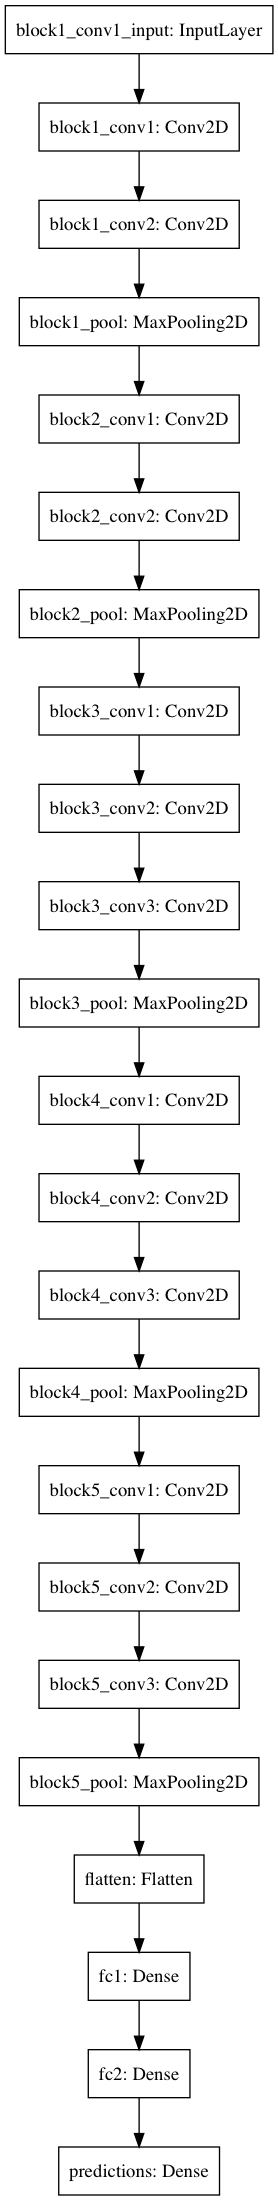

In [12]:
from keras.utils import plot_model

plot_model(model, to_file='vgg16-sequential.png')
Image('vgg16-sequential.png')

In [7]:
# functional api
import keras
from keras.models import Model
from keras.layers import Input, Dense, Activation, Dropout, Flatten
from keras.layers import Conv2D, MaxPool2D


input_shape = (224, 224, 3)
img_input = Input(shape=input_shape, name='img_input')

x = Conv2D(64, (3, 3), padding='same', activation='relu', name='block1_conv1')(img_input)
x = Conv2D(64, (3, 3), padding='same', activation='relu', name='block1_conv2')(x)
x = MaxPool2D((2, 2), strides=(2, 2), name='block1_pool')(x)

x = Conv2D(128, (3, 3), padding='same', activation='relu', name='block2_conv1')(x)
x = Conv2D(128, (3, 3), padding='same', activation='relu', name='block2_conv2')(x)
x = MaxPool2D((2, 2), strides=(2, 2), name='block2_pool')(x)

x = Conv2D(256, (3, 3), padding='same', activation='relu', name='block3_conv1')(x)
x = Conv2D(256, (3, 3), padding='same', activation='relu', name='block3_conv2')(x)
x = Conv2D(256, (3, 3), padding='same', activation='relu', name='block3_conv3')(x)
x = MaxPool2D((2, 2), strides=(2, 2), name='block3_pool')(x)

x = Conv2D(512, (3, 3), padding='same', activation='relu', name='block4_conv1')(x)
x = Conv2D(512, (3, 3), padding='same', activation='relu', name='block4_conv2')(x)
x = Conv2D(512, (3, 3), padding='same', activation='relu', name='block4_conv3')(x)
x = MaxPool2D((2, 2), strides=(2, 2), name='block4_pool')(x)

x = Conv2D(512, (3, 3), padding='same', activation='relu', name='block5_conv1')(x)
x = Conv2D(512, (3, 3), padding='same', activation='relu', name='block5_conv2')(x)
x = Conv2D(512, (3, 3), padding='same', activation='relu', name='block5_conv3')(x)
x = MaxPool2D((2, 2), strides=(2, 2), name='block5_pool')(x)

x = Flatten(name='flatten')(x)
x = Dense(4096, activation='relu', name='fc1')(x)
x = Dense(4096, activation='relu', name='fc2')(x)
x = Dense(1000, activation='softmax', name='predictions')(x)

model2 = Model(inputs=img_input, outputs=x, name='vgg16-funcapi')

model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img_input (InputLayer)       (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

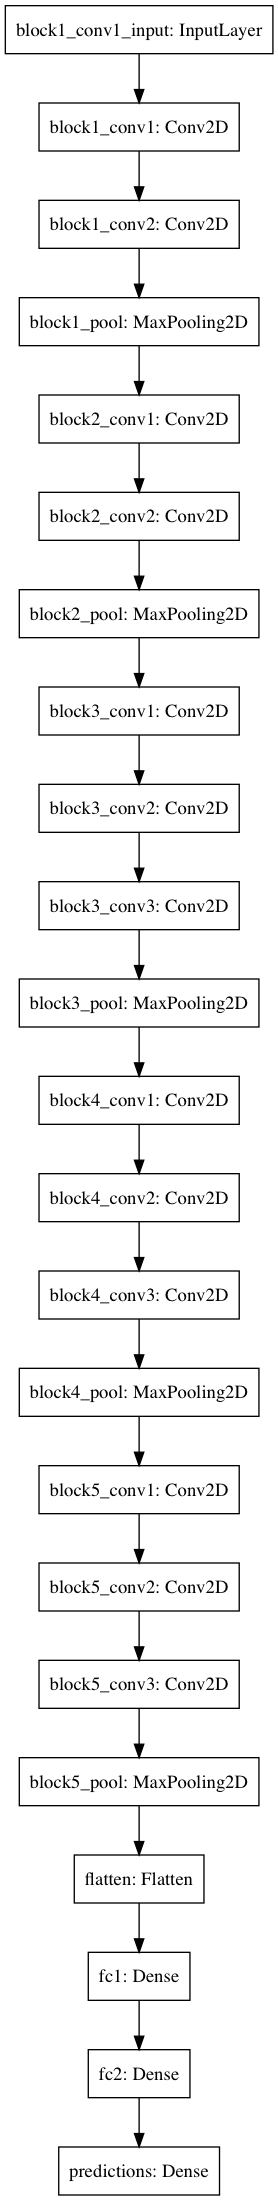

In [10]:
from keras.utils import plot_model

plot_model(model, to_file='vgg16--functional-api-sequential.png')
Image('vgg16--functional-api-sequential.png')